Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Andrea Minano"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [2]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

# This line of code should work on Windows and Mac
#%env QUANDL_API_KEY = "YOUR_API_KEY"

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
import quandl
quandl.ApiConfig.api_key = "YOUR_API_KEY"

ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

start = datetime.datetime(2013, 11, 12)
end = datetime.datetime(2018, 11, 12)

amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end)

### Option 2 - Using Yahoo Finance `yfinance` library

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

amzn = pdr.get_data_yahoo('AMZN', start = start)


In [ ]:
# 2) Using fix_yahoo_finance library only to download AMZN data

amzn = yf.download('AMZN', start=start)

In [ ]:
# If we want to download multipe stocks into a single dataframe:

all_stocks_list = ['AMZN', 'FB']
all_stocks = yf.download(all_stocks_list, start = start)

In [ ]:
### **** ASSIGNMENT CODE STARTS BELOW ****

## Install Yahoo Finance
!pip install yfinance

In [3]:
## Code adapted from tutorial: https://colab.research.google.com/drive/152Nrutl7qO_WfybdJ537ZR05zTsxEbdi?usp=drive_link#scrollTo=VRm25rui1XXl

import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from IPython.display import display
variables = locals()

# Last 60 months
start_date = '2019-07-27'
end_date = '2024-07-27'

## Question 1: Download data for the last 60 months for META, MMM, IBM, AMZN stocks

all_stocks_list = ["META", "MMM", "IBM", "AMZN"]

df = yf.download(
      all_stocks_list,
      start=start_date,
      end=end_date,
      progress=False)

df

Price        Adj Close                                           Close  \
Ticker            AMZN         IBM        META         MMM        AMZN   
Date                                                                     
2019-07-29   95.622498  113.525055  195.538177  119.899605   95.622498   
2019-07-30   94.926498  112.689880  196.635925  120.489754   94.926498   
2019-07-31   93.338997  111.538681  193.831680  118.515816   93.338997   
2019-08-01   92.765999  113.103699  192.334763  117.593300   92.765999   
2019-08-02   91.162003  110.793777  188.632385  115.687256   91.162003   
...                ...         ...         ...         ...         ...   
2024-07-22  182.550003  184.149994  487.399994  104.970001  182.550003   
2024-07-23  186.410004  184.100006  488.690002  104.730003  186.410004   
2024-07-24  180.830002  184.020004  461.269989  103.250000  180.830002   
2024-07-25  179.850006  191.979996  453.410004  103.389999  179.850006   
2024-07-26  182.500000  191.750000  465.700012  127.160004  182.500000   

Price                                                 High              ...  \
Ticker             IBM        META         MMM        AMZN         IBM  ...   
Date                                                                    ...   
2019-07-29  144.244736  195.940002  147.792648   96.611504  144.818359  ...   
2019-07-30  143.183563  197.039993  148.520065   95.494499  143.785858  ...   
2019-07-31  141.720840  194.229996  146.086960   94.977501  143.575531  ...   
2019-08-01  143.709366  192.729996  144.949829   94.896004  146.099426  ...   
2019-08-02  140.774384  189.020004  142.600327   92.318001  146.223709  ...   
...                ...         ...         ...         ...         ...  ...   
2024-07-22  184.149994  487.399994  104.970001  185.059998  184.970001  ...   
2024-07-23  184.100006  488.690002  104.730003  189.389999  185.380005  ...   
2024-07-24  184.020004  461.269989  103.250000  185.449997  185.070007  ...   
2024-07-25  191.979996  453.410004  103.389999  183.899994  196.259995  ...   
2024-07-26  191.750000  465.700012  127.160004  183.190002  193.570007  ...   

Price              Low                    Open                          \
Ticker            META         MMM        AMZN         IBM        META   
Date                                                                     
2019-07-29  195.300003  145.200668   96.500000  144.464630  199.000000   
2019-07-30  193.500000  145.317719   94.556000  143.403442  195.389999   
2019-07-31  192.679993  144.983276   94.905502  143.116638  196.949997   
2019-08-01  190.880005  144.673920   93.585999  142.351822  194.169998   
2019-08-02  188.070007  141.981598   92.253502  142.476105  191.100006   
...                ...         ...         ...         ...         ...   
2024-07-22  483.899994  102.400002  185.000000  183.399994  486.579987   
2024-07-23  487.720001  104.169998  184.100006  184.360001  489.839996   
2024-07-24  460.579987  103.080002  183.199997  184.139999  472.309998   
2024-07-25  442.649994  101.769997  182.910004  186.800003  463.260010   
2024-07-26  459.420013  112.690002  180.389999  190.509995  464.200012   

Price                     Volume                               
Ticker             MMM      AMZN      IBM      META       MMM  
Date                                                           
2019-07-29  145.342804  89864000  2170973  16530800   3156124  
2019-07-30  146.872910  58218000  2753804  11903600   2366764  
2019-07-31  148.536789  89414000  3894153  14593500   3606897  
2019-08-01  146.145493  94266000  6635824  17777000   2847915  
2019-08-02  144.531769  99124000  8474378  15297000   2898028  
...                ...       ...      ...       ...       ...  
2024-07-22  104.059998  39931900  2488500  12023100   2686600  
2024-07-23  105.000000  47537700  2180200   9455500   2172600  
2024-07-24  104.559998  41532400  6962100  17649700   3252000  
2024-07-25  102.720001  44464200  9532800  18240500

In [4]:
## Question 2: Download the adjusted close prices for FB, MMM, IBM and AMZN for the last 60 months.

df_adj = df["Adj Close"]
df_adj

Ticker,AMZN,IBM,META,MMM
Date,,,,
2019-07-29,95.622498,113.525055,195.538177,119.899605
2019-07-30,94.926498,112.689880,196.635925,120.489754
2019-07-31,93.338997,111.538681,193.831680,118.515816
2019-08-01,92.765999,113.103699,192.334763,117.593300
2019-08-02,91.162003,110.793777,188.632385,115.687256
...,...,...,...,...
2024-07-22,182.550003,184.149994,487.399994,104.970001
2024-07-23,186.410004,184.100006,488.690002,104.730003
2024-07-24,180.830002,184.020004,461.269989,103.250000


In [5]:
## Question 3: Resample the data to get prices for the end of the business month. Select the Adjusted Close for each stock.

df_adj = df_adj.resample("BM").last()
df_adj

#df_adj["AMZN"]
#df_adj["META"]
#df_adj["MMM"]
#df_adj["IBM"]

Ticker,AMZN,IBM,META,MMM
Date,,,,
2019-07-31,93.338997,111.538681,193.831680,118.515816
2019-08-30,88.814499,103.176979,185.289246,110.701454
2019-09-30,86.795502,110.706078,177.714813,112.536003
2019-10-31,88.833000,101.806656,191.256973,112.939857
2019-11-29,90.040001,103.563698,201.226501,117.218010
...,...,...,...,...
2024-03-29,180.380005,189.083008,485.098358,88.075600
2024-04-30,175.000000,164.566376,429.743347,95.844353
2024-05-31,176.440002,166.850006,466.366943,100.139999


Text(0.5, 1.0, 'Stock price for AMZN, IBM, META and MMM stocks for the last 60 months')

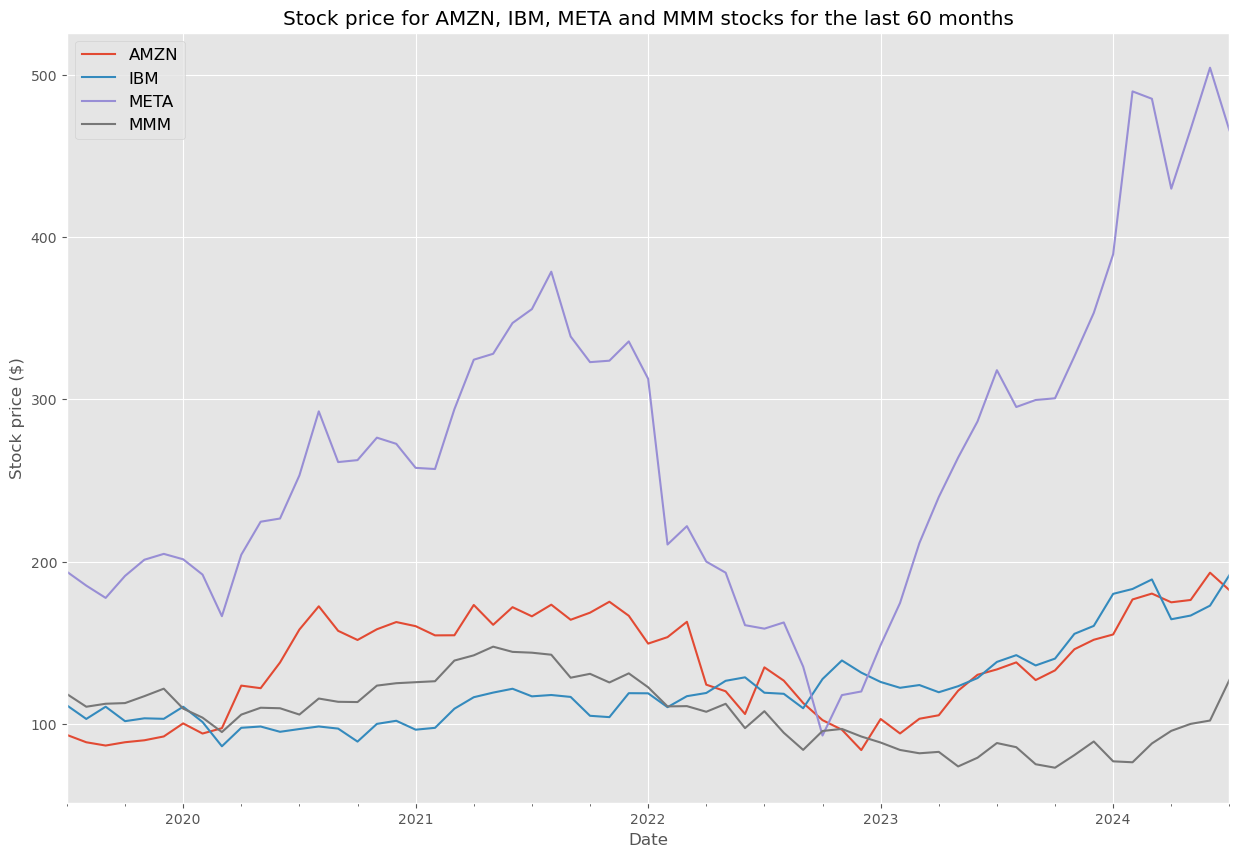

In [6]:
## Plot last-business day stock prices for AMZN, IBM, META and MMM 

from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,5))

## AMZN plot
ax = df_adj['AMZN'].plot(figsize=(15,10))
ax.set_ylabel("Stock price ($)")

## IBM plot
ax = df_adj['IBM'].plot(figsize=(15,10))
ax.set_ylabel("Stock price ($)")

## META plot
ax = df_adj['META'].plot(figsize=(15,10))
ax.set_ylabel("Stock price ($)")

## MMM plot
ax = df_adj['MMM'].plot(figsize=(15,10))
ax.set_ylabel("Stock price ($)")

plt.legend(loc=2, prop={'size': 12})
plt.title('Stock price for AMZN, IBM, META and MMM stocks for the last 60 months')

Text(0.5, 1.0, 'Autocorrelation for AMZN, IBM, META and MMM stocks')

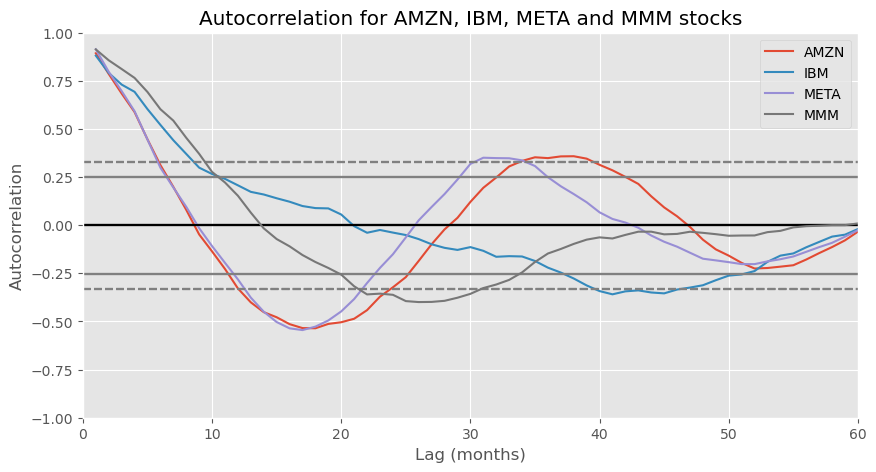

In [7]:
## Question 4: Use the pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.

plt.figure(figsize=(10,5))

ax = autocorrelation_plot(df_adj["AMZN"], label="AMZN")
ax = autocorrelation_plot(df_adj["IBM"], label="IBM")
ax = autocorrelation_plot(df_adj["META"], label="META")
ax = autocorrelation_plot(df_adj["MMM"], label="MMM")
ax.set_xlim(0,60);
ax.set_xlabel("Lag (months)");

plt.title('Autocorrelation for AMZN, IBM, META and MMM stocks')

Yes, they're autocorrelated however for specific period of time. AMZN and META stocks are positively autocorrelated for a period within 9 months. IBM is positively autocorrelated for a period of 20 months. And MMM is positively autocorrelated for a period of ~13 months. This means that for that period of time if the stock was increasing in price, it is expected that the price will continue to increase. Or if the stock price was decreasing, that it will continue to decrease after this period of time. 

For the AMZN and META stocks, the autocorrelation was negative between 9 and ~25 months. At about ~18 months, the autocorrelation value was at its lowest for these two stocks. This means that if the stock was decreasing in price, at 18 months it is expected that the stock starts to increase in price. 

In [8]:
## Question 5: Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using shift() function.
## Use pandas autotocorrelation_plot() to plot the autocorrelation of the monthly returns.
## Are the returns autocorrelated? Provide short explanation.

# Monthly Return = (Closing Price on Last Day of Month / Closing Price on Last Day of Previous Month) - 1.

from datetime import timedelta

copy_df_adj = df_adj.copy()

copy_df_adj["timestamp"] = copy_df_adj.index

copy_df_adj["timestamp_shifted"] = copy_df_adj["timestamp"] + timedelta(days=5)

copy_df_adj.index = copy_df_adj["timestamp_shifted"]

copy_df_adj = copy_df_adj.resample("BM").last()


In [9]:
df_adj

Ticker,AMZN,IBM,META,MMM
Date,,,,
2019-07-31,93.338997,111.538681,193.831680,118.515816
2019-08-30,88.814499,103.176979,185.289246,110.701454
2019-09-30,86.795502,110.706078,177.714813,112.536003
2019-10-31,88.833000,101.806656,191.256973,112.939857
2019-11-29,90.040001,103.563698,201.226501,117.218010
...,...,...,...,...
2024-03-29,180.380005,189.083008,485.098358,88.075600
2024-04-30,175.000000,164.566376,429.743347,95.844353
2024-05-31,176.440002,166.850006,466.366943,100.139999


In [10]:
copy_df_adj.rename(columns={'AMZN': 'AMZN2', 'IBM': 'IBM2', 'META' : 'META2', 'MMM' : 'MMM2'}, inplace=True)

copy_df_adj


Ticker,AMZN2,IBM2,META2,MMM2,timestamp,timestamp_shifted
timestamp_shifted,,,,,,
2019-08-30,93.338997,111.538681,193.831680,118.515816,2019-07-31,2019-08-05
2019-09-30,88.814499,103.176979,185.289246,110.701454,2019-08-30,2019-09-04
2019-10-31,86.795502,110.706078,177.714813,112.536003,2019-09-30,2019-10-05
2019-11-29,88.833000,101.806656,191.256973,112.939857,2019-10-31,2019-11-05
2019-12-31,90.040001,103.563698,201.226501,117.218010,2019-11-29,2019-12-04
...,...,...,...,...,...,...
2024-04-30,180.380005,189.083008,485.098358,88.075600,2024-03-29,2024-04-03
2024-05-31,175.000000,164.566376,429.743347,95.844353,2024-04-30,2024-05-05
2024-06-28,176.440002,166.850006,466.366943,100.139999,2024-05-31,2024-06-05


In [11]:
## Merge both dataframes into one

result = pd.concat([df_adj, copy_df_adj], axis=1)

result

Ticker,AMZN,IBM,META,MMM,AMZN2,IBM2,META2,MMM2,timestamp,timestamp_shifted
2019-07-31,93.338997,111.538681,193.831680,118.515816,NaN,NaN,NaN,NaN,NaT,NaT
2019-08-30,88.814499,103.176979,185.289246,110.701454,93.338997,111.538681,193.831680,118.515816,2019-07-31,2019-08-05
2019-09-30,86.795502,110.706078,177.714813,112.536003,88.814499,103.176979,185.289246,110.701454,2019-08-30,2019-09-04
2019-10-31,88.833000,101.806656,191.256973,112.939857,86.795502,110.706078,177.714813,112.536003,2019-09-30,2019-10-05
2019-11-29,90.040001,103.563698,201.226501,117.218010,88.833000,101.806656,191.256973,112.939857,2019-10-31,2019-11-05
...,...,...,...,...,...,...,...,...,...,...
2024-04-30,175.000000,164.566376,429.743347,95.844353,180.380005,189.083008,485.098358,88.075600,2024-03-29,2024-04-03
2024-05-31,176.440002,166.850006,466.366943,100.139999,175.000000,164.566376,429.743347,95.844353,2024-04-30,2024-05-05
2024-06-28,193.250000,172.949997,504.220001,102.190002,176.440002,166.850006,466.366943,100.139999,2024-05-31,2024-06-05
2024-07-31,182.500000,191.750000,465.700012,127.160004,193.250000,172.949997,504.220001,102.190002,2024-06-28,2024-07-03


In [12]:
# Monthly Return = (Closing Price on Last Day of Month / Closing Price on Last Day of Previous Month) - 1.

result["AMZN_Return"] = ((result["AMZN"] / result["AMZN2"]) - 1)
result["IBM_Return"] = ((result["IBM"] / result["IBM2"]) - 1)
result["META_Return"] = ((result["META"] / result["META2"]) - 1)
result["MMM_Return"] = ((result["MMM"] / result["MMM2"]) - 1)

result

Ticker,AMZN,IBM,META,MMM,AMZN2,IBM2,META2,MMM2,timestamp,timestamp_shifted,AMZN_Return,IBM_Return,META_Return,MMM_Return
2019-07-31,93.338997,111.538681,193.831680,118.515816,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2019-08-30,88.814499,103.176979,185.289246,110.701454,93.338997,111.538681,193.831680,118.515816,2019-07-31,2019-08-05,-0.048474,-0.074967,-0.044071,-0.065935
2019-09-30,86.795502,110.706078,177.714813,112.536003,88.814499,103.176979,185.289246,110.701454,2019-08-30,2019-09-04,-0.022733,0.072973,-0.040879,0.016572
2019-10-31,88.833000,101.806656,191.256973,112.939857,86.795502,110.706078,177.714813,112.536003,2019-09-30,2019-10-05,0.023475,-0.080388,0.076202,0.003589
2019-11-29,90.040001,103.563698,201.226501,117.218010,88.833000,101.806656,191.256973,112.939857,2019-10-31,2019-11-05,0.013587,0.017259,0.052126,0.037880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,175.000000,164.566376,429.743347,95.844353,180.380005,189.083008,485.098358,88.075600,2024-03-29,2024-04-03,-0.029826,-0.129661,-0.114111,0.088206
2024-05-31,176.440002,166.850006,466.366943,100.139999,175.000000,164.566376,429.743347,95.844353,2024-04-30,2024-05-05,0.008229,0.013877,0.085222,0.044819
2024-06-28,193.250000,172.949997,504.220001,102.190002,176.440002,166.850006,466.366943,100.139999,2024-05-31,2024-06-05,0.095273,0.036560,0.081166,0.020471
2024-07-31,182.500000,191.750000,465.700012,127.160004,193.250000,172.949997,504.220001,102.190002,2024-06-28,2024-07-03,-0.055627,0.108702,-0.076395,0.244349


<Axes: >

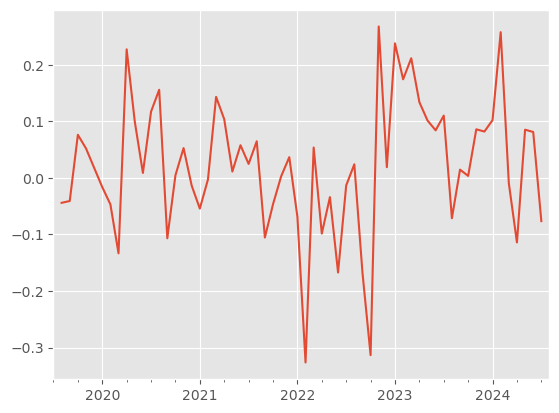

In [13]:
result["META_Return"].plot()

Text(0.5, 1.0, 'Autocorrelation for monthly returns for AMZN, IBM, META and MMM stocks')

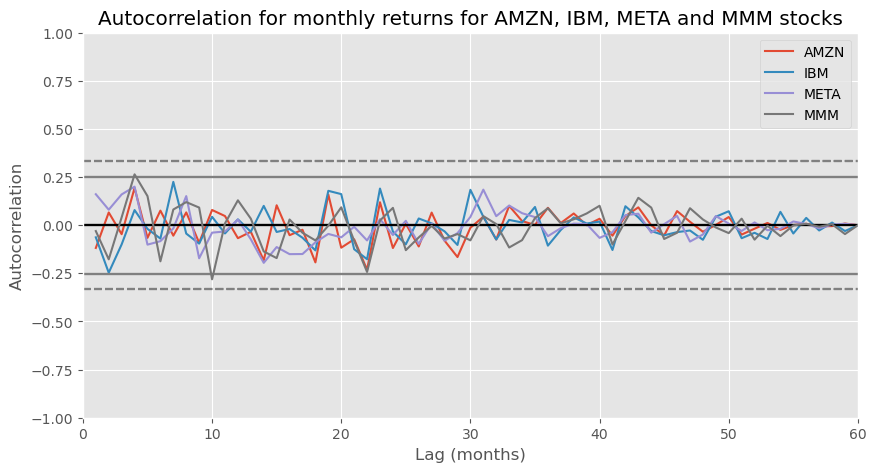

In [14]:
plt.figure(figsize=(10,5))

ax_2 = autocorrelation_plot(result["AMZN_Return"].dropna(), label="AMZN")
ax_2 = autocorrelation_plot(result["IBM_Return"].dropna(), label="IBM")
ax_2 = autocorrelation_plot(result["META_Return"].dropna(), label="META")
ax_2 = autocorrelation_plot(result["MMM_Return"].dropna(), label="MMM")
ax_2.set_xlim(0,60);
ax_2.set_xlabel("Lag (months)");

plt.title('Autocorrelation for monthly returns for AMZN, IBM, META and MMM stocks')

It does not appear that the monthly returns are autocorrelated since the majority of the autocorrelation values are close to 0.

In [ ]:
## Question 6: Combine all 4 time series (returns) into a single DataFrame,
## Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use scatter_matrix() function from pandas.plotting).
## Explain the results. Is there any correlation?

array([[<Axes: xlabel='AMZN_Return', ylabel='AMZN_Return'>,
        <Axes: xlabel='IBM_Return', ylabel='AMZN_Return'>,
        <Axes: xlabel='META_Return', ylabel='AMZN_Return'>,
        <Axes: xlabel='MMM_Return', ylabel='AMZN_Return'>],
       [<Axes: xlabel='AMZN_Return', ylabel='IBM_Return'>,
        <Axes: xlabel='IBM_Return', ylabel='IBM_Return'>,
        <Axes: xlabel='META_Return', ylabel='IBM_Return'>,
        <Axes: xlabel='MMM_Return', ylabel='IBM_Return'>],
       [<Axes: xlabel='AMZN_Return', ylabel='META_Return'>,
        <Axes: xlabel='IBM_Return', ylabel='META_Return'>,
        <Axes: xlabel='META_Return', ylabel='META_Return'>,
        <Axes: xlabel='MMM_Return', ylabel='META_Return'>],
       [<Axes: xlabel='AMZN_Return', ylabel='MMM_Return'>,
        <Axes: xlabel='IBM_Return', ylabel='MMM_Return'>,
        <Axes: xlabel='META_Return', ylabel='MMM_Return'>,
        <Axes: xlabel='MMM_Return', ylabel='MMM_Return'>]], dtype=object)

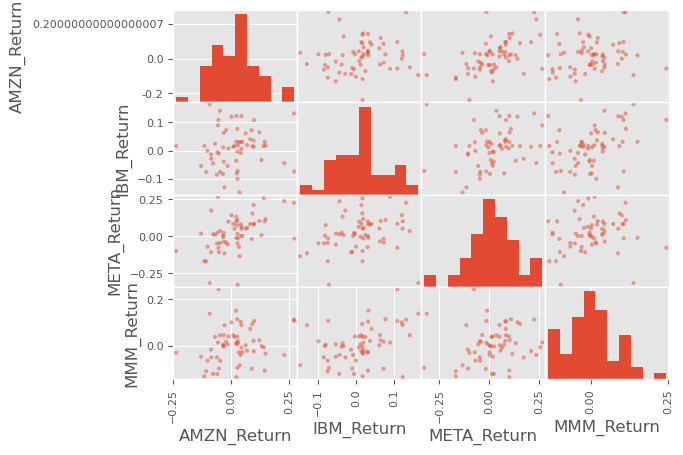

In [15]:
pd.plotting.scatter_matrix(result.iloc[:, -4:])

There appears to be a positive correlation between the AMZN monthly profits and the META monthly profits. Likely because these two stocks tend to have similar fluctuations in their stock prices. As AMZN monthly profits increase, META monthly profits also increase. And vice versa.